1689502702.473332
1689502702.474218
1689502702.4747689


/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_40757/3070167128.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


1689502758.0780659


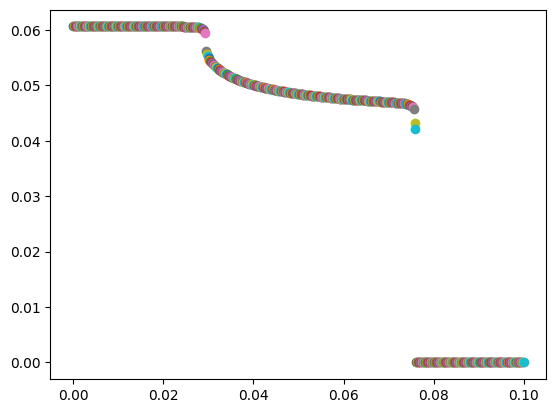

1689502760.148522


In [3]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time
#from scipy.integrate import quad

print(time())

## gap_eq をdef

def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))


def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)


##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2 =100, 1, 1, 1, 0, 1, 500, 1, 1    # 7.525 #9.21
qs   = np.linspace(0,0.1,n0)  #(np.pi/a)
Bs   = np.linspace(0.06,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(0.001,0.0,n2)


##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[j], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append([d0, abs(d1-d0), k])
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

##gapのq依存
for j in range(n2):    ##q,gap図
    for i in range(n1):
        ans_q = []
        for h in range(n0):
            ans_q.append(ans[h][i][j][0])
            figure = plt.scatter(qs[h], ans[h][i][j][0], label = 'kBT='+str(kBTs[j]))
plt.savefig("FFLO_q-gap(N=100,B=0.06_simple).png")
plt.show()


In [3]:
for h in range(n0):
    print(ans[h][0][0][0])
print(ans)

0.06061997600386742
0.06061997630469198
0.06061997720716372
0.06061997871127692
0.060619980817021885
0.06061998352438519
0.06061998683334955
0.060619990743893744
0.0606199952559928
0.06062000036961786
0.060620006084736194
0.06062001240131126
0.06062001931930268
0.060620026838666186
0.06062003495935368
0.060620043681313227
0.060620053004489034
0.06062006292882147
0.06062007345424707
0.06062008458069844
0.06062009630810444
0.06062010863639006
0.06062012156547641
0.060620135095280754
0.06062014922571651
0.06062016395669331
0.060620179288116846
0.060620195219889025
0.0606202117519079
0.060620228884067644
0.0606202466162586
0.06062026494836729
0.060620283880276356
0.0606203034118646
0.060620323543006976
0.060620344273574614
0.06062036560343475
0.06062038753245083
0.06062041006048242
0.060620433187385234
0.06062045691301112
0.060620481237208174
0.06062050615982053
0.06062053168068853
0.06062055779964869
0.06062058451653362
0.06062061183117216
0.06062063974338919
0.06062066825300589
0.0606206